In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as pt
import seaborn as sb
pd.options.mode.chained_assignment = None

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/ipynb/sem4_ada/data/beds/Year_2020_Age_10to20.csv')
df2 = pd.read_csv('/content/drive/MyDrive/ipynb/sem4_ada/data/beds/Year_2020_Age_20to30.csv')
df3 = pd.read_csv('/content/drive/MyDrive/ipynb/sem4_ada/data/beds/Year_2020_Age_30to40.csv')
df4 = pd.read_csv('/content/drive/MyDrive/ipynb/sem4_ada/data/beds/Year_2020_Age_40to50.csv')
df5 = pd.read_csv('/content/drive/MyDrive/ipynb/sem4_ada/data/beds/Year_2020_Age_50to60.csv')
df6 = pd.read_csv('/content/drive/MyDrive/ipynb/sem4_ada/data/beds/Year_2021_Age_40to50.csv')
df7 = pd.read_csv('/content/drive/MyDrive/ipynb/sem4_ada/data/beds/Year_2021_Age_50to60.csv')
df8 = pd.read_csv('/content/drive/MyDrive/ipynb/sem4_ada/data/beds/Year_2022-23_Age_10to20.csv')
df9 = pd.read_csv('/content/drive/MyDrive/ipynb/sem4_ada/data/beds/Year_2022-23_Age_20to30.csv')
df10 = pd.read_csv('/content/drive/MyDrive/ipynb/sem4_ada/data/beds/Year_2022-23_Age_30to40.csv')
df11 = pd.read_csv('/content/drive/MyDrive/ipynb/sem4_ada/data/beds/Year_2022-23_Age_40to50.csv')
df12 = pd.read_csv('/content/drive/MyDrive/ipynb/sem4_ada/data/beds/Year_2022-23_Age_50to60.csv')

In [ ]:
df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11,df12], ignore_index=True)

In [ ]:
df.head()

,P_ID,P_Age,Gender,Bed_No,Pre-existing Conditions,Condition Severity,Disease type,Admission_ID,Admission_Date,Admission_Type,Department,Treatment_Start_Date,Treatment_End_Date,Bed_Release_Date,Recovery_Time,Bed_Allocation_Date
0,7001234,18,Male,421,NaN,Mild,Normal,ABCD1234,2020-01-01,Emergency,General Surgery,2020-01-02,2020-01-07,2020-01-07,6,NaN
1,7005678,15,Female,468,Diabetes,Moderate,ICU,EFGH5678,2020-02-15,Scheduled,Neurology,2020-02-16,2020-02-23,2020-02-23,8,NaN
2,7009012,12,Male,492,Hypertension,Severe,Highly communicable,IJKL9012,2020-03-20,Emergency,Cardiology,2020-03-21,2020-04-05,2020-04-05,16,NaN
3,7012345,19,Female,435,Depression,Mild,Normal,MNOP2345,2020-04-10,Scheduled,General Surgery,2020-04-11,2020-04-16,2020-04-16,6,NaN
4,7012346,17,Male,408,NaN,Moderate,ICU,PQRS2346,2020-05-15,Emergency,Neurology,2020-05-16,2020-05-23,2020-05-23,8,NaN


## Preprocessing

In [ ]:
df['Pre-existing Conditions'].isna().sum()

193

In [ ]:
df.drop(['Admission_Date', 'Bed_No', 'Bed_Release_Date','Treatment_Start_Date','Treatment_End_Date','Bed_Allocation_Date', 'P_ID','Admission_ID'], axis=1, inplace=True)

In [ ]:
df.head()

,P_Age,Gender,Pre-existing Conditions,Condition Severity,Disease type,Admission_Type,Department,Recovery_Time
0,18,Male,NaN,Mild,Normal,Emergency,General Surgery,6
1,15,Female,Diabetes,Moderate,ICU,Scheduled,Neurology,8
2,12,Male,Hypertension,Severe,Highly communicable,Emergency,Cardiology,16
3,19,Female,Depression,Mild,Normal,Scheduled,General Surgery,6
4,17,Male,NaN,Moderate,ICU,Emergency,Neurology,8


In [ ]:
df.to_csv('disease.csv')

In [ ]:
df.isna().sum()

,0
P_Age,0
Gender,0
Pre-existing Conditions,193
Condition Severity,7
Disease type,0
Admission_Type,0
Department,0
Recovery_Time,0


In [ ]:
s = 'hyper and dia'
'hyper' in s

True

In [ ]:
type(df['Pre-existing Conditions'][4]) == float

True

In [ ]:
def encode_existing(x):
  dis = ['hypertension', 'diabetes', 'depression']
  for i in range(len(x)):
    if type(x[i]) == float:
      x[i] = 0
      continue
    c = 0
    for j in dis:
      if j in x[i].lower():
        c += 1
    x[i] = c
  x = x.astype(int)
  return x

In [ ]:
df['Pre-existing Conditions'] = encode_existing(df['Pre-existing Conditions'])

In [ ]:
df['Pre-existing Conditions'].value_counts()

,count
Pre-existing Conditions,
2,597
1,305
0,286
3,1


In [ ]:
df = df[df['Pre-existing Conditions'] != 3]

In [ ]:
df['Pre-existing Conditions'].unique()

array([0, 1, 2])

In [ ]:
le = LabelEncoder()

In [ ]:
df['Gender'] = le.fit_transform(df['Gender'])
df['Condition Severity'] = le.fit_transform(df['Condition Severity'])
df['Admission_Type'] = le.fit_transform(df['Admission_Type'])
df['Department'] = le.fit_transform(df['Department'])
df['Disease type'] = le.fit_transform(df['Disease type'])

In [ ]:
df[['P_Age']] = df[['P_Age']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

In [ ]:
df

,P_Age,Gender,Pre-existing Conditions,Condition Severity,Disease type,Admission_Type,Department,Recovery_Time
0,0.263158,1,0,0,2,0,1,6
1,0.210526,0,1,1,1,1,2,8
2,0.157895,1,1,2,0,0,0,16
3,0.280702,0,1,0,2,1,1,6
4,0.245614,1,0,1,1,0,2,8
...,...,...,...,...,...,...,...,...
1184,0.947368,0,2,2,1,0,0,15
1185,0.912281,0,2,1,2,0,1,9
1186,0.912281,1,2,1,2,1,0,9
1187,0.929825,0,2,1,2,2,1,9


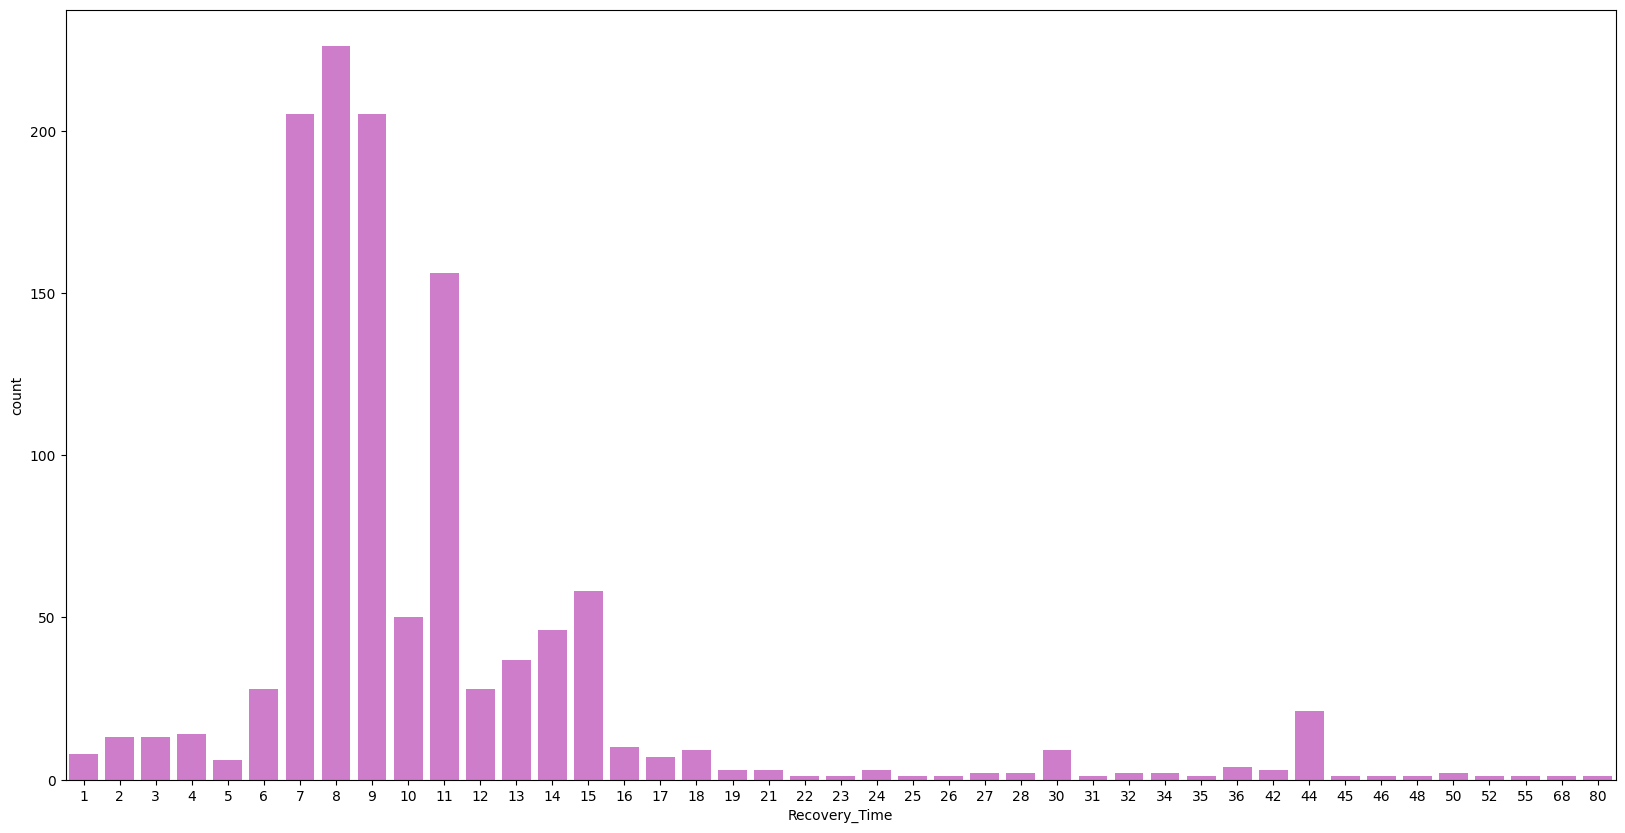

In [ ]:
pt.figure(figsize=(20,10))
sb.barplot(df['Recovery_Time'].value_counts(), color='orchid');

In [ ]:
df['Recovery_Time'] = df['Recovery_Time'].astype(int)

In [ ]:
df = df[(df['Recovery_Time'] >= 0) & (df['Recovery_Time'] <= 20)]

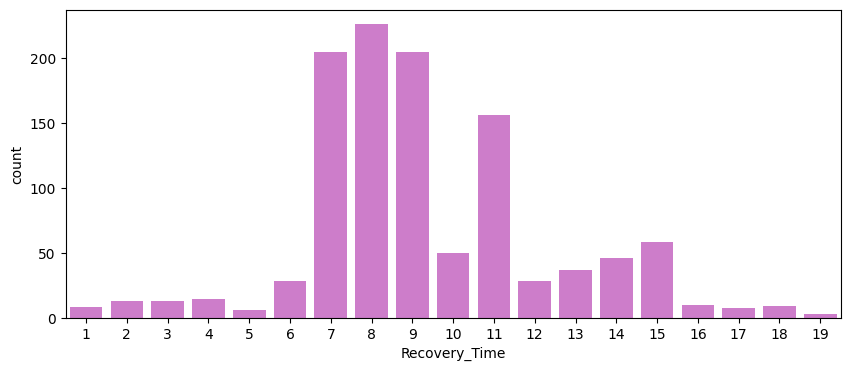

In [ ]:
pt.figure(figsize=(10,4))
sb.barplot(df['Recovery_Time'].value_counts(), color='orchid');

In [ ]:
# prompt: try out different machine learning models to see which one gives us the maximum accuracy. the column we are trying to predict is Recovery_Time.

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'df' is your DataFrame with 'Recovery_Time' as the target variable
x = df.drop('Recovery_Time', axis=1)
y = df['Recovery_Time']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=6)

# Try different models
models = [
    ("Linear Regression", LinearRegression()),
    ("Decision Tree", DecisionTreeRegressor()),
    ("Support Vector Machine", SVR()),
    ("Random Forest", RandomForestRegressor(n_estimators=20))
]

for name, model in models:
    # Train the model
    model.fit(x_train, y_train)

    # Make predictions
    y_pred = model.predict(x_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {name} ---")
    print("Mean Squared Error:", mse)
    print("R-squared:", r2)
    print()


--- Linear Regression ---
Mean Squared Error: 6.497908962065397
R-squared: 0.0664739026033635

--- Decision Tree ---
Mean Squared Error: 5.828303261122909
R-squared: 0.16267321848246596

--- Support Vector Machine ---
Mean Squared Error: 6.107813504434525
R-squared: 0.12251720704180413

--- Random Forest ---
Mean Squared Error: 4.569270720704366
R-squared: 0.34355290467288424

